# <h3 align="center">__Module 9 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 9__</h3>
# <h3 align="center">__Due at the end of Module 9__</h3><br>

# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic.

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Problem 1: Investigating Feature Importance in Decision Tree & Random Forest Regression

You are working with a housing dataset where your goal is to predict house prices based on different features like square footage, number of bedrooms, and location. You will train a Decision Tree Regressor and a Random Forest Regressor and compare how each model determines feature importance.

## Code
Following is modified code to calculate the accuracy of model to answer the followup questions. Also, used sklearn Pipeline to optimize code.

--- Decision Tree ---
R-squared: 0.6980
RMSE: 6,257.60

--- Random Forest ---
R-squared: 0.8431
RMSE: 4,510.22



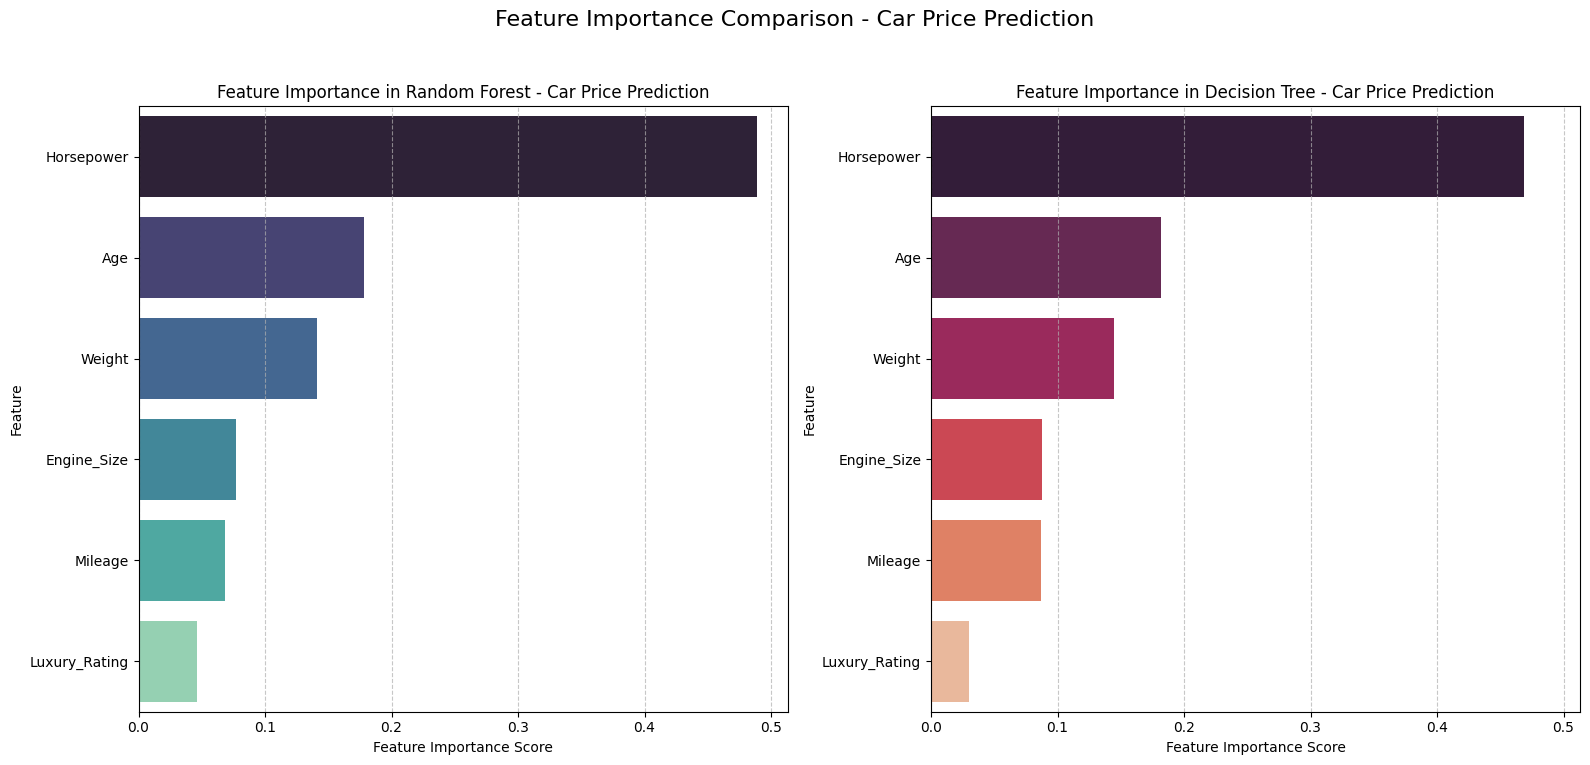

         Feature  Importance          Model
0    Engine_Size    0.087509  Decision Tree
1     Horsepower    0.469006  Decision Tree
2         Weight    0.145016  Decision Tree
3            Age    0.181493  Decision Tree
4        Mileage    0.087018  Decision Tree
5  Luxury_Rating    0.029958  Decision Tree
0    Engine_Size    0.077392  Random Forest
1     Horsepower    0.488575  Random Forest
2         Weight    0.141219  Random Forest
3            Age    0.178017  Random Forest
4        Mileage    0.068223  Random Forest
5  Luxury_Rating    0.046574  Random Forest


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate a synthetic dataset with more features for a Car Price Prediction Model
np.random.seed(2)
n_samples = 200

engine_size = np.random.rand(n_samples) * 5  # Engine size in liters
horsepower = np.random.rand(n_samples) * 125  # Horsepower
weight = np.random.rand(n_samples) * 4000  # Car weight in pounds
age = np.random.randint(1, 20, n_samples)  # Age of car in years
mileage = np.random.rand(n_samples) * 200000  # Miles driven
luxury_rating = np.random.randint(1, 10, n_samples)  # Subjective luxury rating

# Target variable: Price of the car in USD
y = (
    2500 * engine_size +
    250 * horsepower -
    3 * weight -
    800 * age -
    0.05 * mileage +
    1000 * luxury_rating +
    np.random.normal(0, 5000, n_samples)  # Adding noise
)

# Create a dataframe
df_cars = pd.DataFrame({
    "Engine_Size": engine_size,
    "Horsepower": horsepower,
    "Weight": weight,
    "Age": age,
    "Mileage": mileage,
    "Luxury_Rating": luxury_rating,
    "Price": y
})

# Split dataset into features and target variable
X = df_cars.drop(columns=["Price"])
y = df_cars["Price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline to run the both model
pipelines = {
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', DecisionTreeRegressor(max_depth=5, random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
}

# This loop will store the results for plotting later.
importance_data = []

for name, pipeline in pipelines.items():
    # Fit the entire pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"--- {name} ---")
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE: {rmse:,.2f}\n")

    # Extract feature importances from the fitted model inside the pipeline
    importances = pipeline.named_steps['regressor'].feature_importances_

    # Store the results for plotting
    temp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Model': name})
    importance_data.append(temp_df)

# Combine the importance data from all models into a single DataFrame
importance_df = pd.concat(importance_data)

# Plot feature importances
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)
fig.suptitle('Feature Importance Comparison - Car Price Prediction', fontsize=16)


# Plot 1: Random Forest (on the left subplot)
importance_df_rf = importance_df[importance_df['Model'] == 'Random Forest'].sort_values(by='Importance', ascending=False)
sns.barplot(ax=axes[0], x="Importance", y="Feature", data=importance_df_rf, palette="mako", hue="Feature", legend=False)
axes[0].set_title('Feature Importance in Random Forest - Car Price Prediction')
axes[0].set_xlabel('Feature Importance Score')
axes[1].set_ylabel("Feature")
axes[0].grid(axis="x", linestyle="--", alpha=0.7)


# Plot 2: Decision Tree (on the right subplot)
importance_df_dt = importance_df[importance_df['Model'] == 'Decision Tree'].sort_values(by='Importance', ascending=False)
sns.barplot(ax=axes[1], x="Importance", y="Feature", data=importance_df_dt, palette="rocket", hue="Feature", legend=False)
axes[1].set_title('Feature Importance in Decision Tree - Car Price Prediction')
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel("Feature")
axes[1].grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

# Print the dataframe to see the numbers
print(importance_df)



## Q1. Compare the feature importance scores from the Decision Tree and Random Forest models. Are they similar or different? Why might this be the case?
**Ans.** Looking into both plot and importance_df, we don't see any big difference on feature scoring between Decision Tree and Random forest. They looks very much similar.

Generally, Random forest feature importance is robust and trust worthy. Since our test data doesn't represent the real world data with noise therefore here both showes very similar feature importance.

## Q2. Which feature has the highest importance in predicting car prices? Does this make sense logically? You have the "pricing function" try messing with the values.

**Ans.** As per both plot and `importance_df`, we can clearly sees that `Horsepower` feature has highest importance in predicting Car price. Our test data is very small and ranomly generated therefore it's not wise to compare it with real life feature importance for car price.

## Q3. Try removing the least important feature from the dataset and retrain the model. Does the model's performance change significantly?
**Ans** Let's rewrite the code as below to keep primary feature `Horsepower` and two secondary `Age` and `Weight`.

--- Decision Tree ---
R-squared: 0.5232
RMSE: 7,862.67

--- Random Forest ---
R-squared: 0.7586
RMSE: 5,594.58



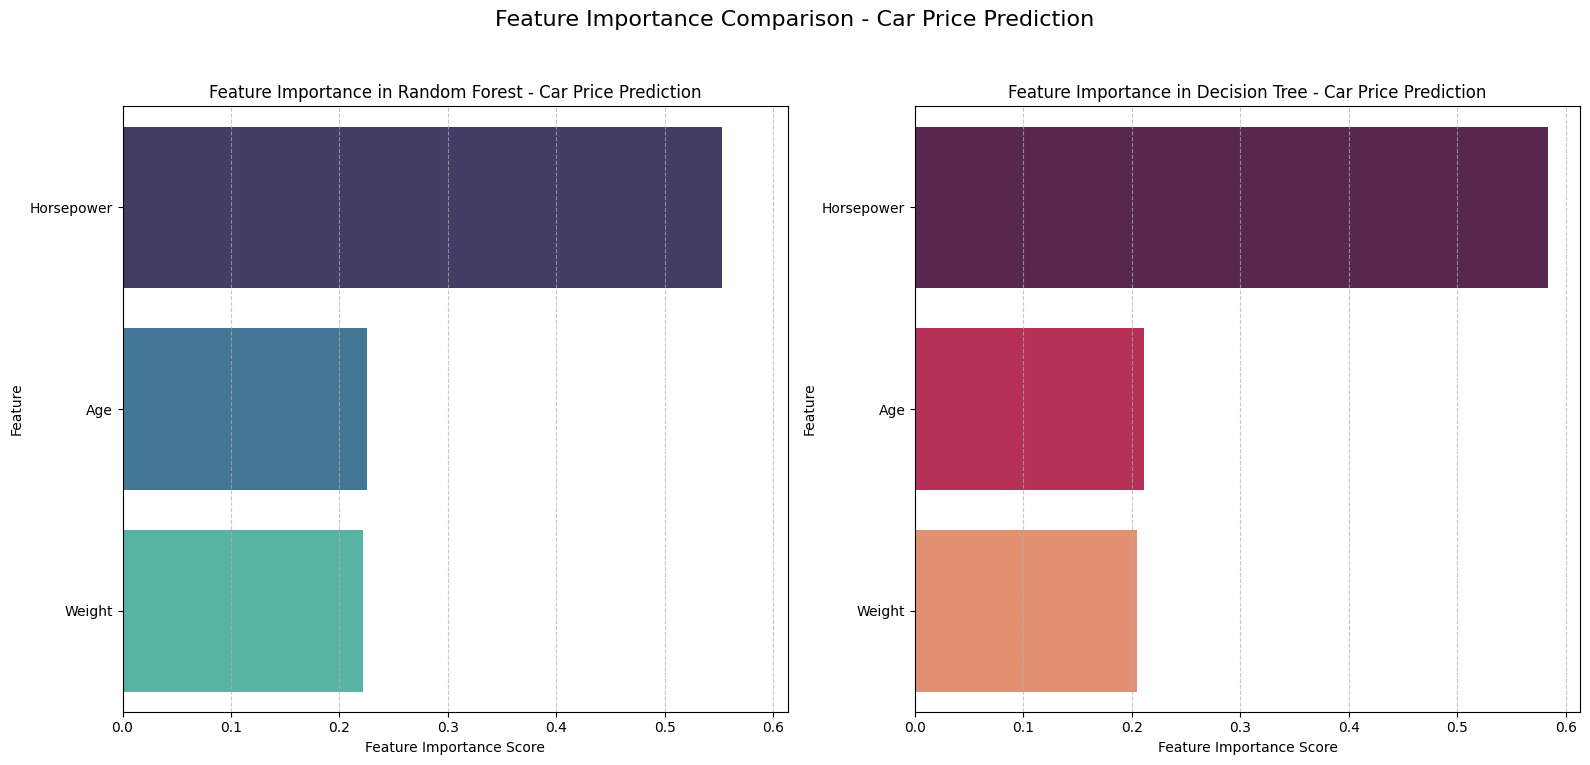

      Feature  Importance          Model
0  Horsepower    0.583854  Decision Tree
1      Weight    0.204625  Decision Tree
2         Age    0.211521  Decision Tree
0  Horsepower    0.552680  Random Forest
1      Weight    0.222042  Random Forest
2         Age    0.225278  Random Forest


In [6]:

# Split dataset into features with `Horsepower`, `Age` and `Weight` and target variable
X = df_cars.drop(columns=["Price", "Engine_Size", "Mileage", "Luxury_Rating"])
y = df_cars["Price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline to run the both model
pipelines = {
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', DecisionTreeRegressor(max_depth=5, random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
}

# This loop will store the results for plotting later.
importance_data = []

for name, pipeline in pipelines.items():
    # Fit the entire pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"--- {name} ---")
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE: {rmse:,.2f}\n")

    # Extract feature importances from the fitted model inside the pipeline
    importances = pipeline.named_steps['regressor'].feature_importances_

    # Store the results for plotting
    temp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Model': name})
    importance_data.append(temp_df)

# Combine the importance data from all models into a single DataFrame
importance_df = pd.concat(importance_data)

# Plot feature importances
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)
fig.suptitle('Feature Importance Comparison - Car Price Prediction', fontsize=16)


# Plot 1: Random Forest (on the left subplot)
importance_df_rf = importance_df[importance_df['Model'] == 'Random Forest'].sort_values(by='Importance', ascending=False)
sns.barplot(ax=axes[0], x="Importance", y="Feature", data=importance_df_rf, palette="mako", hue="Feature", legend=False)
axes[0].set_title('Feature Importance in Random Forest - Car Price Prediction')
axes[0].set_xlabel('Feature Importance Score')
axes[1].set_ylabel("Feature")
axes[0].grid(axis="x", linestyle="--", alpha=0.7)


# Plot 2: Decision Tree (on the right subplot)
importance_df_dt = importance_df[importance_df['Model'] == 'Decision Tree'].sort_values(by='Importance', ascending=False)
sns.barplot(ax=axes[1], x="Importance", y="Feature", data=importance_df_dt, palette="rocket", hue="Feature", legend=False)
axes[1].set_title('Feature Importance in Decision Tree - Car Price Prediction')
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel("Feature")
axes[1].grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

# Print the dataframe to see the numbers
print(importance_df)



With all the features, following were the metrics

```
--- Decision Tree ---
R-squared: 0.6980
RMSE: 6,257.60

--- Random Forest ---
R-squared: 0.8431
RMSE: 4,510.22
```
After keeping only three primary features, we have following.

```
--- Decision Tree ---
R-squared: 0.5232
RMSE: 7,862.67

--- Random Forest ---
R-squared: 0.7586
RMSE: 5,594.58
```
It clearly shows that accuracy is decreased little bit. But overall change is not that bad compare to `6` features originally vs `3` features with the modification.

Due to very small data size, we do see impact on accuracy. On the real world data with large size, we would not see any significant impact on model accuracy even after removing the low importance features.

# Problem 2: Investigating Multicollinearity and Regularization in Regression Models

Multicollinearity can make linear regression models unstable. In this activity, you'll calculate Variance Inflation Factor (VIF) to identify multicollinearity and apply Ridge & Lasso Regression to handle it.

## Code

In [7]:

# Create multicollinear features
X6 = engine_size + np.random.normal(0, 0.1, n_samples)  # Correlated with engine_size
X7 = horsepower + np.random.normal(0, 5, n_samples)  # Correlated with horsepower

# Update dataframe with new correlated features
df_cars["Engine_Size_Correlated"] = X6
df_cars["Horsepower_Correlated"] = X7

# Update feature set
X_multi = df_cars.drop(columns=["Price"])
y_multi = df_cars["Price"]

# Standardize the new dataset
scaler = StandardScaler()
X_multi_scaled = pd.DataFrame(scaler.fit_transform(X_multi), columns=X_multi.columns)

# Compute VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multi_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi_scaled.values, i) for i in range(X_multi_scaled.shape[1])]

# Train models
X_train, X_test, y_train, y_test = train_test_split(df_cars, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=10).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

# Print coefficients
coef_df = pd.DataFrame({"Feature": df_cars.columns, "LinearRegression": lr.coef_,
                         "Ridge": ridge.coef_, "Lasso": lasso.coef_})

# Display tables
print("VIF Scores:")
display(vif_data)
print("\nModel Coefficients:")
display(coef_df)

VIF Scores:


,Feature,VIF
0,Engine_Size,212.969201
1,Horsepower,62.619393
2,Weight,1.075828
3,Age,1.008499
4,Mileage,1.054740
5,Luxury_Rating,1.035206
6,Engine_Size_Correlated,212.978928
7,Horsepower_Correlated,62.601755



Model Coefficients:


,Feature,LinearRegression,Ridge,Lasso
0,Engine_Size,7.416138e-12,4.690695e-06,4.884321e+00
1,Horsepower,3.862466e-13,4.116145e-07,-3.752106e-02
2,Weight,4.124305e-16,-9.636292e-09,8.109792e-06
3,Age,-6.245644e-13,-2.748489e-06,-0.000000e+00
4,Mileage,-1.665335e-16,-1.441658e-10,-5.380936e-07
5,Luxury_Rating,-6.176647e-14,3.359525e-06,-0.000000e+00
6,Price,1.000000e+00,1.000000e+00,1.000006e+00
7,Engine_Size_Correlated,-6.078095e-12,3.766090e-06,-4.831324e+00
8,Horsepower_Correlated,-1.419114e-13,3.715232e-07,3.574081e-02


## Q1. Look at the VIF scores for the features. Which feature has the highest multicollinearity?

**Ans.** VIF Score tells us how much the variance of the estimated coefficient is “inflated” by its correlation with other features.

- **VIF = 1**: No correlation. The feature is completely independent. This is the ideal, but rare.
- **1 < VIF < 5**: Moderate correlation. This is generally considered safe and not a cause for concern.
- **VIF > 5**: High correlation. This is a potential red flag and should be investigated.
- **VIF > 10**: Very high correlation. This is a strong sign of serious multicollinearity, and the coefficients for this feature are likely unstable and unreliable.

We can clearly see that following features has high multicollinearity
1. `Engine_Size` and `Engine_Size_Correlated` with VIF score as `212`
2. `Horsepower` and `Horsepower_Correlated` with VIF score as `62`

## Q2. Compare the coefficients of Linear Regression vs. Ridge vs. Lasso. How do Ridge and Lasso modify the coefficients to handle multicollinearity?

**Ans.**

**Linear Regression**
- It doesn't make sense to assign opposite sign to `Engine_Size` with `7.416138e-12` and `Engine_Size_Correlated` with `-6.078095e-12`. It says that Car price will be increased if `Engine` is increased but at the same time price will be decreased if highly correlated feature `Engine_Size_Correlated` is increased.
- Same unstabilty estimated for `Horsepower` and `Horsepower_Correlated` as well with opposite sign.

**Ridge Regression**
- It is more stable as we see that it has assigned `4.690695e-06` to `Engine_Size` and `3.766090e-06` to `Engine_Size_Correlated`.
- Same stability is estimated for `Horsepower` and `Horsepower_Correlated` with `4.116145e-07` and `3.715232e-07` respectivly.

**Lasso Regression**
- Result confusing as it has assigned opposite sign to `Engine_Size` with `4.884321e+00` and `Engine_Size_Correlated` with `-4.831324e+00`.
- Since Lasso is a feature based selection model therefore it should assign near zero value to the highly correlated feature.

**Why Lasso Regression result is buggy?**

The surprising result we are seeing is due to a critical bug in our data preparation step that is causing a phenomenon called perfect multicollinearity.

**The Bug: Data Leakage into the Features**

```
X_train, X_test, y_train, y_test = train_test_split(df_cars, y, test_size=0.2, random_state=42)
```
- We are splitting `df_cars` for both our features (`X_train`) and our target (`y_train`).
- This means the `Price` column, which is our target variable, is also one of the columns inside `X_train`.

**Why This Caused the Bizarre Lasso Behavior**

When we include the target variable as a feature, we create perfect multicollinearity. The model is trying to solve this equation:
```
Price ≈ w₁*Engine_Size + ... + w₆*Price + ...
```
The most obvious and perfect way for any linear model to solve this is to learn:
- A coefficient of 1.0 for the Price feature.
- A coefficient of 0.0 for all other features.

The model essentially learns the trivial solution: Predicted_Price = 1.0 * Actual_Price.

Let's fix the code by correcting the Data Preparation as below
```
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
```

**Note:** Since data is generated using random therefore everytime we run the code, it produce different result.

Following is complete code.

In [8]:

# Create multicollinear features
X6 = engine_size + np.random.normal(0, 0.1, n_samples)  # Correlated with engine_size
X7 = horsepower + np.random.normal(0, 5, n_samples)  # Correlated with horsepower

# Update dataframe with new correlated features
df_cars["Engine_Size_Correlated"] = X6
df_cars["Horsepower_Correlated"] = X7

# Update feature set
X_multi = df_cars.drop(columns=["Price"])
y_multi = df_cars["Price"]

# Standardize the new dataset
scaler = StandardScaler()
X_multi_scaled = pd.DataFrame(scaler.fit_transform(X_multi), columns=X_multi.columns)

# Compute VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multi_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi_scaled.values, i) for i in range(X_multi_scaled.shape[1])]

# Train models
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=10).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

# Print coefficients
coef_df = pd.DataFrame({"Feature": X_multi.columns, "LinearRegression": lr.coef_,
                         "Ridge": ridge.coef_, "Lasso": lasso.coef_})

# Display tables
print("VIF Scores:")
display(vif_data)
print("\nModel Coefficients:")
display(coef_df)

VIF Scores:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.601e+09, tolerance: 2.765e+06
  model = cd_fast.enet_coordinate_descent(


,Feature,VIF
0,Engine_Size,215.732759
1,Horsepower,62.343019
2,Weight,1.067046
3,Age,1.020324
4,Mileage,1.062943
5,Luxury_Rating,1.037705
6,Engine_Size_Correlated,215.812412
7,Horsepower_Correlated,62.315462



Model Coefficients:


,Feature,LinearRegression,Ridge,Lasso
0,Engine_Size,7166.340311,1699.673498,7065.920477
1,Horsepower,264.810630,260.104701,264.829522
2,Weight,-3.166002,-3.172998,-3.166095
3,Age,-894.940803,-892.932544,-894.926582
4,Mileage,-0.045948,-0.045814,-0.045946
5,Luxury_Rating,1117.451375,1111.032214,1117.504699
6,Engine_Size_Correlated,-4400.690254,1010.663438,-4300.612183
7,Horsepower_Correlated,-13.620449,-7.480072,-13.607199


**Why we still see problem with Lasso regression coefficient data?**

This is bcz of the lower value for alpha
```
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
```
alphase close to zero makes Lasso regression similar to Linear Regression, therefore we don't see impact of L1 regularization.

Let's discuss details in the next question related to alpha parameter.


## Q3. Try increasing the alpha value for Ridge and Lasso. How does this change the coefficients? What happens when you set alpha too high?

**Ans:** alpha value close to zero makes both Ridge and Lasso regression similar to Linear regression. Therefore it is very much important to choose higher value of alpha. In the above code, we already chosen relatively higher value for Ridge but `0.1` for Lasso makes it similar to Linear regression.

Let's choose `100` value for both to compare the impact.

In [9]:

# Create multicollinear features
X6 = engine_size + np.random.normal(0, 0.1, n_samples)  # Correlated with engine_size
X7 = horsepower + np.random.normal(0, 5, n_samples)  # Correlated with horsepower

# Update dataframe with new correlated features
df_cars["Engine_Size_Correlated"] = X6
df_cars["Horsepower_Correlated"] = X7

# Update feature set
X_multi = df_cars.drop(columns=["Price"])
y_multi = df_cars["Price"]

# Standardize the new dataset
scaler = StandardScaler()
X_multi_scaled = pd.DataFrame(scaler.fit_transform(X_multi), columns=X_multi.columns)

# Compute VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multi_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi_scaled.values, i) for i in range(X_multi_scaled.shape[1])]

# Train models
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=100).fit(X_train, y_train)
lasso = Lasso(alpha=100).fit(X_train, y_train)

# Print coefficients
coef_df = pd.DataFrame({"Feature": X_multi.columns, "LinearRegression": lr.coef_,
                         "Ridge": ridge.coef_, "Lasso": lasso.coef_})

# Display tables
print("VIF Scores:")
display(vif_data)
print("\nModel Coefficients:")
display(coef_df)

VIF Scores:


,Feature,VIF
0,Engine_Size,185.149324
1,Horsepower,55.472680
2,Weight,1.089673
3,Age,1.010711
4,Mileage,1.063129
5,Luxury_Rating,1.041744
6,Engine_Size_Correlated,185.172260
7,Horsepower_Correlated,55.613696



Model Coefficients:


,Feature,LinearRegression,Ridge,Lasso
0,Engine_Size,-3394.280994,1155.410807,0.000000
1,Horsepower,196.982751,200.830513,200.031523
2,Weight,-3.290273,-3.241977,-3.244240
3,Age,-901.919924,-883.358872,-894.913557
4,Mileage,-0.045143,-0.045115,-0.045302
5,Luxury_Rating,1115.555925,1037.874931,1110.746840
6,Engine_Size_Correlated,6149.412514,1231.047804,2725.352177
7,Horsepower_Correlated,53.033038,49.346132,51.229169


With higher `alpha` we see following model coefficients now.


| | Feature | LinearRegression | Ridge | Lasso |
|---|---|---|---|---|
| **0** | Engine_Size | 5175.014952 | 1215.204147 | 2712.825593 |
| **1** | Horsepower | 250.479706 | 255.690042 | 252.182582 |
| **2** | Weight | -3.185174 | -3.184713 | -3.172422 |
| **3** | Age | -895.363704 | -880.978779 | -891.442030 |
| **4** | Mileage | -0.045596 | -0.045768 | -0.045904 |
| **5** | Luxury_Rating | 1128.592038 | 1023.854688 | 1104.206358 |
| **6** | Engine_Size_Correlated | -2434.203875 | 1163.390318 | 0.000000 |
| **7** | Horsepower_Correlated | 1.979655 | -5.297926 | 0.000000 |

Note: Since data is generated with random, therefore I have captured above result for discussion purpose as it might changes on next run.

**Ridge Regression**

- Ridge regression is still more stable compared to Linear regression.
- Both `Engine` and `Engine_Size_Correlated` has high value with positive sign.
- Compared to `Horsepower`, `Horsepower_Correlated` does has negaive value, but is very small so makes it stable.

**Lasso Regression**

- We can clearly see the model decided to drop the highly correlated `Engine_Size_Correlated` and `Horsepower_Correlated`
- This is the reason Lasso Regression is best suitable to handle highly correlated features.

# Problem 3: Comparing Decision Tree Regression and Support Vector Regression for Nonlinear data

Support vector regression can model data that is lienar and non-linear by using different kernel functions. The linear kernel works best when there is a linear relationship between features and the target variable. Radial Basis Function kernels can understand non-linear patterns similar to decision trees. You can also smooth the step functions of a decision tree by using random forest regression. In this activity, you'll compare their performance on a nonlinear dataset.

## Code

In [17]:
# Generate Nonlinear Data
np.random.seed(42)
X_nl = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y_nl = np.sin(X_nl).ravel() + np.random.normal(0, 0.1, X_nl.shape[0])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)

# Train Support Vector Regression models
svr_linear = SVR(kernel='linear', C=1.0)
svr_linear.fit(X_train, y_train)


# Train Decision Tree Regression model and Random Forest
tree_reg = DecisionTreeRegressor(max_depth=5)
forest_reg = RandomForestRegressor(n_estimators=100)

tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)

# Predict on test set
y_pred_svr_linear = svr_linear.predict(X_test)

y_pred_tree = tree_reg.predict(X_test)
y_pred_forest = forest_reg.predict(X_test)

## Tasks#1. Compute the mean squared error of the models.

In [18]:
from sklearn.metrics import mean_squared_error

mse_svr_linear = mean_squared_error(y_test, y_pred_svr_linear)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)

print(f"SVR (Linear Kernel) MSE: {mse_svr_linear:.4f}")
print(f"Decision Tree MSE: {mse_tree:.4f}")
print(f"Random Forest MSE: {mse_forest:.4f}\n")

SVR (Linear Kernel) MSE: 0.1586
Decision Tree MSE: 0.0169
Random Forest MSE: 0.0150



## Tasks# 2. Plot the decision tree vs the random forest model

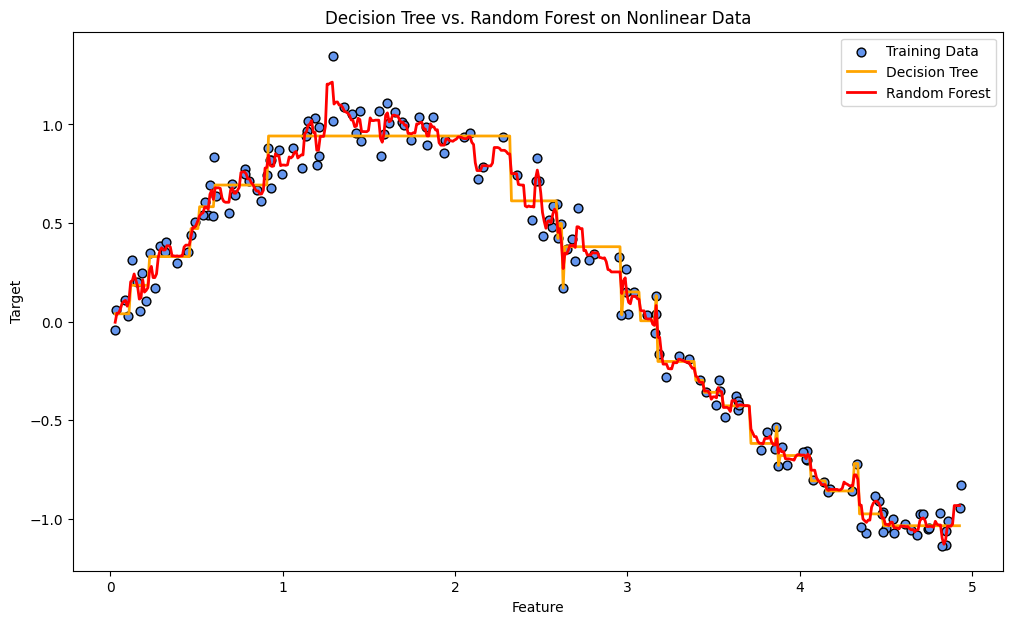

In [19]:
# Create a smooth range of X values for plotting the prediction lines
X_plot = np.arange(X_nl.min(), X_nl.max(), 0.01)[:, np.newaxis]
y_plot_tree = tree_reg.predict(X_plot)
y_plot_forest = forest_reg.predict(X_plot)

plt.figure(figsize=(12, 7))
plt.scatter(X_train, y_train, s=40, edgecolor="black", c="cornflowerblue", label="Training Data")
plt.plot(X_plot, y_plot_tree, color="orange", linewidth=2, label="Decision Tree")
plt.plot(X_plot, y_plot_forest, color="red", linewidth=2, label="Random Forest")
plt.title("Decision Tree vs. Random Forest on Nonlinear Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

## Tasks#3. Plot the linear kernel SVR against the decision tree or random forest.

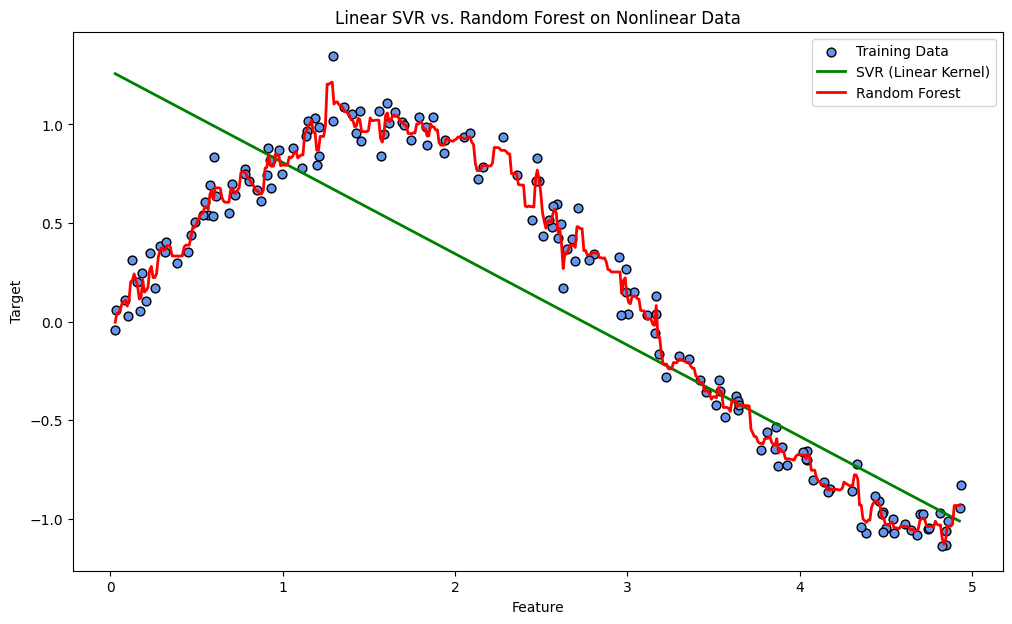

In [20]:
y_plot_svr_linear = svr_linear.predict(X_plot)

plt.figure(figsize=(12, 7))
plt.scatter(X_train, y_train, s=40, edgecolor="black", c="cornflowerblue", label="Training Data")
plt.plot(X_plot, y_plot_svr_linear, color="green", linewidth=2, label="SVR (Linear Kernel)")
plt.plot(X_plot, y_plot_forest, color="red", linewidth=2, label="Random Forest")
plt.title("Linear SVR vs. Random Forest on Nonlinear Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

## Tasks#4. Add the radial basis function kernel SVR to the code.

In [21]:
svr_rbf = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100, gamma='auto')

## Tasks# 5. Compute the mean squared error of all the models again.

In [22]:
y_pred_svr_rbf = svr_rbf.predict(X_test)
mse_svr_rbf = mean_squared_error(y_test, y_pred_svr_rbf)

# Create a summary DataFrame
mse_summary = pd.DataFrame({
    'Model': ['SVR (Linear)', 'Decision Tree', 'Random Forest', 'SVR (RBF)'],
    'Mean Squared Error': [mse_svr_linear, mse_tree, mse_forest, mse_svr_rbf]
}).sort_values('Mean Squared Error')

display(mse_summary.round(4))

,Model,Mean Squared Error
3,SVR (RBF),0.0121
2,Random Forest,0.0150
1,Decision Tree,0.0169
0,SVR (Linear),0.1586


## Tasks# 6. Plot the SVR with rbf kernel against all other models.

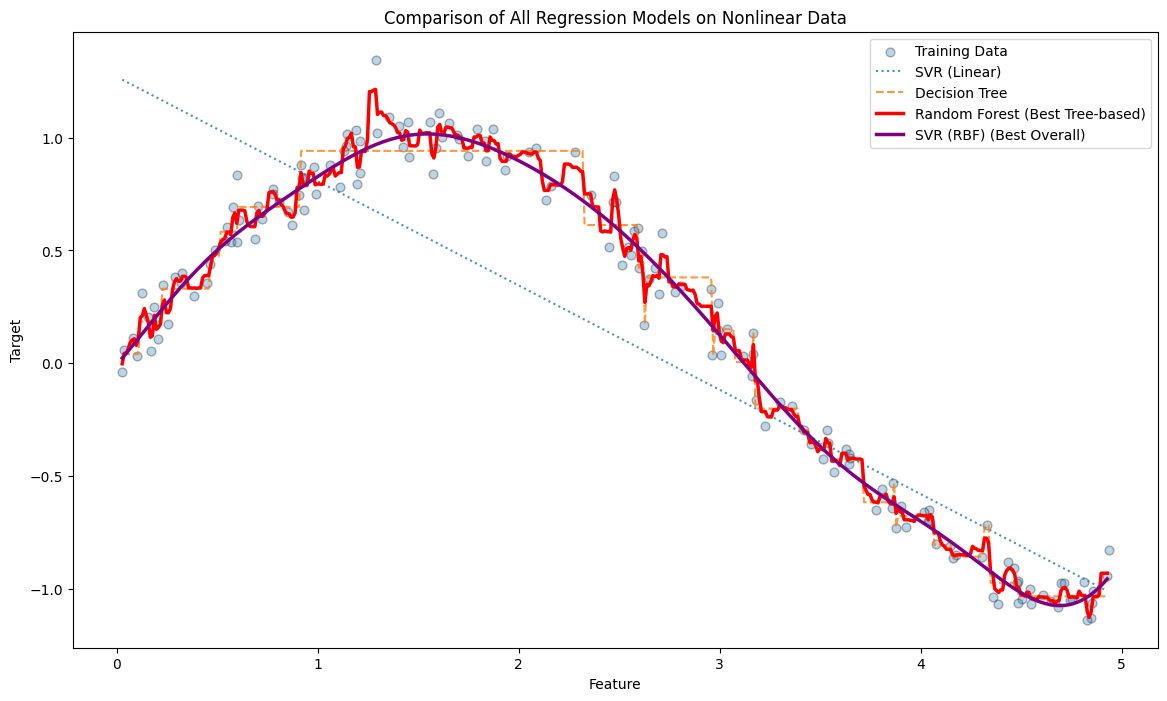

In [23]:
y_plot_svr_rbf = svr_rbf.predict(X_plot)

plt.figure(figsize=(14, 8))
plt.scatter(X_train, y_train, s=40, edgecolor="black", alpha=0.3, label="Training Data")
plt.plot(X_plot, y_plot_svr_linear, linestyle=':', alpha=0.8, label="SVR (Linear)")
plt.plot(X_plot, y_plot_tree, linestyle='--', alpha=0.8, label="Decision Tree")
plt.plot(X_plot, y_plot_forest, color="red", linewidth=2.5, label="Random Forest (Best Tree-based)")
plt.plot(X_plot, y_plot_svr_rbf, color="purple", linewidth=2.5, label="SVR (RBF) (Best Overall)")
plt.title("Comparison of All Regression Models on Nonlinear Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

## Q1. Compare the MSE (Mean Squared Error) of all models. Which model performs better?

**Ans.** Comparing all MSE, we can clearly see that `SVR(RBF)` model is having losest error therefore performed better compared to rest.

| | Model | Mean Squared Error |
|---|---|---|
| **3** | SVR (RBF) | 0.0121 |
| **2** | Random Forest | 0.0150 |
| **1** | Decision Tree | 0.0169 |
| **0** | SVR (Linear) | 0.1586 |

## Q2. Look at the plot of the fitted curves. Compare and contrast all the models smoothness curves.
**Ans.**
- Plot will clearly show the "stairstep" predictions of the `Decision Tree` and the much smoother, more accurate curve of the `Random Forest`. It visually demonstrates how `Random Forest` averages out the noise and instability of a single tree.
- Plot also shows the completely inadequate straight line of the `linear SVR` against the well-fitted curve of the `Random Forest`, highlighting the need for non-linear models.
- `SVR(RBF)` procuded most smooth curve.
- `SVR (RBF)` and `Random Forest` models are vastly superior.


## Q3. Try increasing the depth of the Decision Tree (max_depth=10) or the number of iterations of the random forest. What happens to the predictions? Do you observe overfitting?

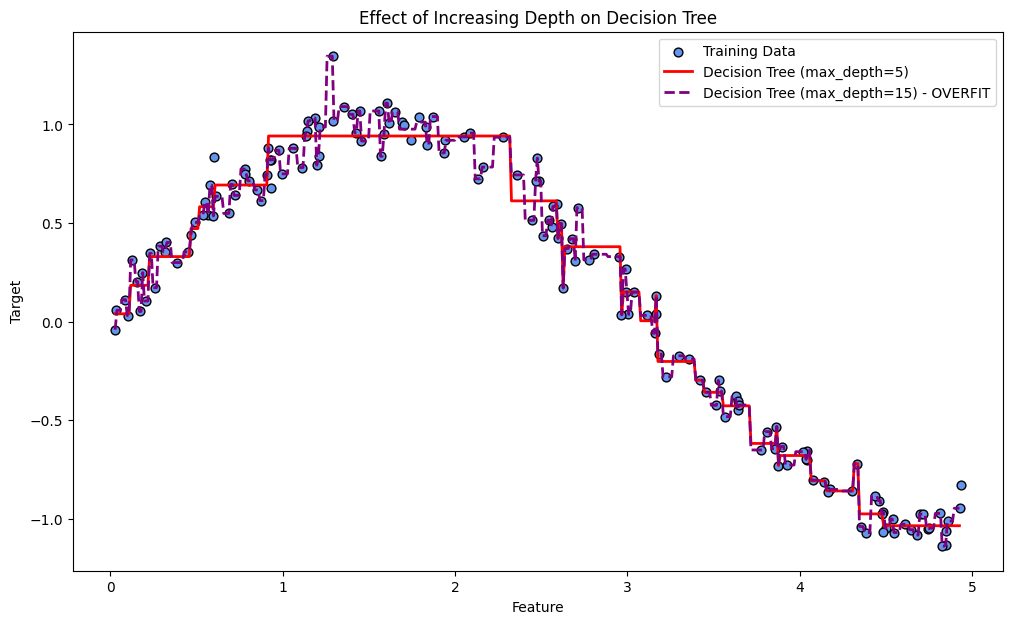

In [25]:
# Generate Nonlinear Data
np.random.seed(42)
X_nl = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y_nl = np.sin(X_nl).ravel() + np.random.normal(0, 0.1, X_nl.shape[0])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)

# Train Support Vector Regression models
svr_linear = SVR(kernel='linear', C=1.0)
svr_linear.fit(X_train, y_train)


# Train Decision Tree Regression model and Random Forest
tree_reg_overfit = DecisionTreeRegressor(max_depth=15) # Increased depth from 5 to 15
forest_reg_more_trees = RandomForestRegressor(n_estimators=500) # Increased from 100 to 500

tree_reg_overfit.fit(X_train, y_train)
forest_reg_more_trees.fit(X_train, y_train)

# Predict on test set
y_pred_tree_overfit = tree_reg_overfit.predict(X_test)
y_pred_forest_overfit = forest_reg_more_trees.predict(X_test)

# Visualize the effect on predictions

# Plot 1: The Effect on the Decision Tree
plt.figure(figsize=(12, 7))
plt.scatter(X_train, y_train, s=40, edgecolor="black", c="cornflowerblue", label="Training Data")
plt.plot(X_plot, tree_reg.predict(X_plot), color="red", linewidth=2, label="Decision Tree (max_depth=5)")
plt.plot(X_plot, tree_reg_overfit.predict(X_plot), color="purple", linestyle='--', linewidth=2, label="Decision Tree (max_depth=15) - OVERFIT")
plt.title("Effect of Increasing Depth on Decision Tree")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

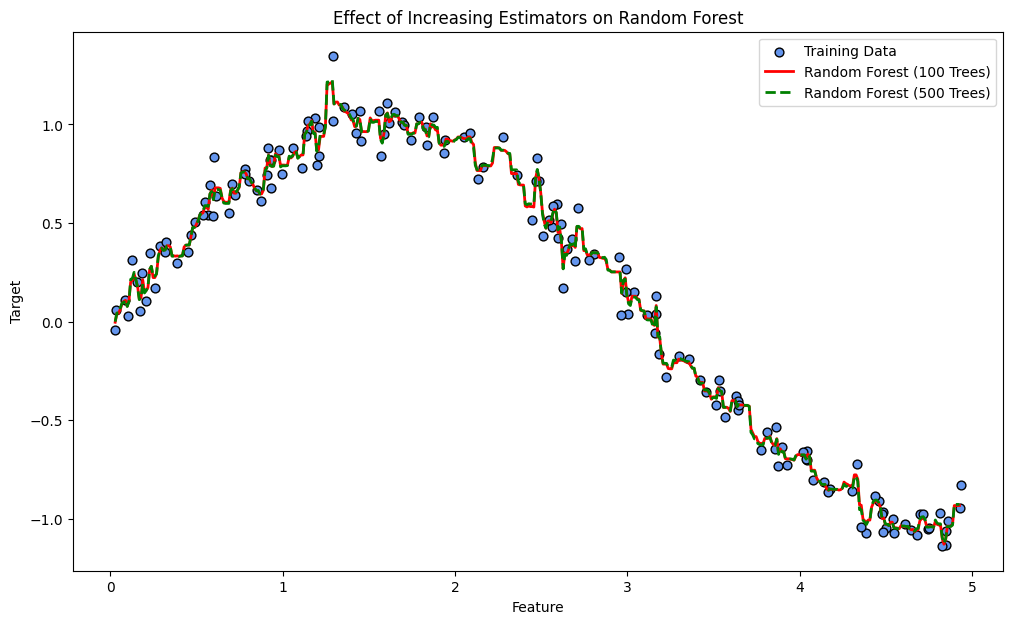

In [26]:
# Plot 2: The Effect on the Random Forest
plt.figure(figsize=(12, 7))
plt.scatter(X_train, y_train, s=40, edgecolor="black", c="cornflowerblue", label="Training Data")
plt.plot(X_plot, forest_reg.predict(X_plot), color="red", linewidth=2, label="Random Forest (100 Trees)")
plt.plot(X_plot, forest_reg_more_trees.predict(X_plot), color="green", linestyle='--', linewidth=2, label="Random Forest (500 Trees)")
plt.title("Effect of Increasing Estimators on Random Forest")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [28]:
# Quantify Overfitting with MSE scores

# A helper function to print scores
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    print(f"--- {name} ---")
    print(f"Training MSE: {mse_train:.4f}")
    print(f"Testing MSE:  {mse_test:.4f}")
    print("-" * 30)

evaluate_model("Decision Tree (max_depth=5)", tree_reg, X_train, y_train, X_test, y_test)
evaluate_model("Decision Tree (max_depth=15)", tree_reg_overfit, X_train, y_train, X_test, y_test)
evaluate_model("Random Forest (100 Trees)", forest_reg, X_train, y_train, X_test, y_test)
evaluate_model("Random Forest (500 Trees)", forest_reg_more_trees, X_train, y_train, X_test, y_test)

--- Decision Tree (max_depth=5) ---
Training MSE: 0.0073
Testing MSE:  0.0169
------------------------------
--- Decision Tree (max_depth=15) ---
Training MSE: 0.0000
Testing MSE:  0.0208
------------------------------
--- Random Forest (100 Trees) ---
Training MSE: 0.0020
Testing MSE:  0.0150
------------------------------
--- Random Forest (500 Trees) ---
Training MSE: 0.0019
Testing MSE:  0.0150
------------------------------


**For the Decision Tree (max_depth=15):** Yes, we observe significant overfitting.

- The Training MSE is `0.0000`. This is a massive red flag. It means the model made zero error on the data it was trained on. It has a "perfect" memory.
- The Testing MSE is much, much higher. When shown new data, the model's performance collapses. This huge gap between training and testing performance is the statistical definition of overfitting.

**For the Random Forest (n_estimators=500):** No, we do not observe overfitting.

- The gap between training and testing MSE does not grow. Both models have a small, healthy gap.
- Adding more trees slightly improves both the training and testing error. The model becomes marginally better and more stable.
